In [62]:
import numpy as np
import math
from scipy.misc import derivative
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider

HW1

In [63]:
#Problem 1
def find_initial_guess_intervals(f, start=0, step_size=0.5, max_steps=1000):
    """
    Find initial guess intervals [a, b] of length 1 for the Bisection Method where the function changes sign.

    Parameters:
    - f: The function for which to find the roots.
    - start: The starting point for the search.
    - step_size: The step size to use when moving from the start point.
    - max_steps: The maximum number of steps to take from the start point.

    Returns:
    - A list of tuples [(a, b), ...] representing the intervals, or empty list if no change in sign is found.
    """
    intervals = []
    x_prev = start
    f_prev = f(x_prev)
    for _ in range(max_steps):
        x_next = x_prev + step_size
        f_next = f(x_next)

        if f_prev * f_next < 0:
            a = min(x_prev, x_next)
            b = max(x_prev, x_next)
            # Ensure that the interval is unique and does not significantly overlap with existing intervals
            if not any(a <= interval[1] and b >= interval[0] for interval in intervals):
                intervals.append((a, b))

        x_prev, f_prev = x_next, f_next

        # Invert direction if reaching the end of the step limit
        if _ == max_steps // 2:
            x_prev = start
            f_prev = f(x_prev)
            step_size = -step_size
        
    if not intervals:
        print("Failed to find a change in sign. Try adjusting the start point or step size.")
    
    return intervals

def bisection_method(f, a, b, tol=1e-5, max_iterations=1000):
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, max_iterations + 1):
        x_n = (a_n + b_n) / 2
        f_x_n = f(x_n)
        if f(a_n) * f_x_n < 0:
            b_n = x_n
        elif f(b_n) * f_x_n < 0:
            a_n = x_n
        elif f_x_n == 0:
            print("Found exact solution.")
            return x_n
        else:
            print("Bisection method fails.")
            return None
        if abs(b - a)/2**n <= tol:  #e_n <= epsilon; abs(b_n - a_n) <= tol can also work
            return x_n
    print("Exceeded maximum iterations.")
    return (a_n + b_n) / 2

def equation1(x): return np.exp(x)-3*x**2
def equation2(x): return x**3-x**2-x-1
def equation3(x): return np.exp(x)-(1/(0.1+x**2))
def equation4(x): return x-1-0.3*np.cos(x)

def find_and_process_roots(equation, equation_number):
    intervals = find_initial_guess_intervals(equation)
    if intervals:
        for interval in intervals:
            root = bisection_method(equation, *interval)
            if root is not None:
                print(f"Equation {equation_number}: Interval {interval}. The root found is: {root}")
    else:
        print(f"Equation {equation_number}: No valid intervals found.")

# Example usage for each equation
find_and_process_roots(equation1, 1)
find_and_process_roots(equation2, 2)
find_and_process_roots(equation3, 3)
find_and_process_roots(equation4, 4)

Equation 1: Interval (0.5, 1.0). The root found is: 0.9100112915039062
Equation 1: Interval (3.5, 4.0). The root found is: 3.7330856323242188
Equation 1: Interval (-0.5, 0). The root found is: -0.45896148681640625
Equation 2: Interval (1.5, 2.0). The root found is: 1.8392868041992188
Equation 3: Interval (0.5, 1.0). The root found is: 0.6497573852539062
Equation 4: Interval (1.0, 1.5). The root found is: 1.1284255981445312


In [64]:
def newton_method(f, df, x0, tol=1e-5, max_iter=100):
    """
    Finds a root of the function f(x) = 0 using Newton's method, and returns the number of iterations.

    Parameters:
    - f: The function for which we are trying to approximate a root.
    - df: The derivative of the function f.
    - x0: Initial guess for a root of f(x).
    - tol: The tolerance for the approximation of the root.
    - max_iter: The maximum number of iterations.

    Returns:
    - A tuple containing:
        - The approximation for the root of f(x) = 0 if found, otherwise None.
        - The number of iterations used.
    """
    xn = x0
    for n in range(1, max_iter + 1):
        fxn = f(xn)
        dfxn = df(xn)
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return None, n
        h = fxn / dfxn
        xn_next = xn - h
        if abs(h) < tol and math.isclose(f(xn_next), 0, abs_tol=tol):
            return xn_next, n
        xn = xn_next
    print(f"Failed to converge to the requested tolerance or precision within {max_iter} iterations for B={B}.")
    return xn, max_iter

# Define the derivatives of the equations
df1 = lambda x: np.exp(x) - 6*x
df2 = lambda x: 3*x**2 - 2*x - 1
df3 = lambda x: np.exp(x) + 2*x/(0.1 + x**2)**2
df4 = lambda x: 1 + 0.3*np.sin(x)

def find_and_process_roots_Newton(equation, df, equation_number):
    intervals = find_initial_guess_intervals(equation)
    if intervals:
        for interval in intervals:
            root, n =  newton_method(equation, df, bisection_method(equation, *interval))
            if root is not None:
                print(f"Equation {equation_number}: Initial guess {bisection_method(equation, *interval)}. The root found is: {root}")
    else:
        print(f"Equation {equation_number}: No valid intervals found.")

# Example usage for each equation
find_and_process_roots_Newton(equation1, df1, 1)
find_and_process_roots_Newton(equation2, df2, 2)
find_and_process_roots_Newton(equation3, df3, 3)
find_and_process_roots_Newton(equation4, df4, 4)

Equation 1: Initial guess 0.9100112915039062. The root found is: 0.9100075724968794
Equation 1: Initial guess 3.7330856323242188. The root found is: 3.7330790286730404
Equation 1: Initial guess -0.45896148681640625. The root found is: -0.4589622675374317
Equation 2: Initial guess 1.8392868041992188. The root found is: 1.8392867552141632
Equation 3: Initial guess 0.6497573852539062. The root found is: 0.6497506817520194
Equation 4: Initial guess 1.1284255981445312. The root found is: 1.1284250929922375


In [65]:
f = lambda x, B: x + np.exp(-B * x ** 2) * np.cos(x)
df = lambda x, B: 1 - 2 * B * x * np.exp(-B * x ** 2) * np.cos(x) - np.exp(-B * x ** 2) * np.sin(x)

# Values of B to test and initial guess
B_values = [1, 5, 10, 25, 50]
x0 = 0

# Apply Newton's method and print results along with iterations
for B in B_values:
    root, iterations = newton_method(lambda x: f(x, B), lambda x: df(x, B), x0)
    print(f"Root for B={B}: {root}, found in {iterations} iterations\n")

Root for B=1: -0.5884017765009963, found in 5 iterations

Root for B=5: -0.404911548201141, found in 7 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=10.
Root for B=10: -0.0007451436379846132, found in 100 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=25.
Root for B=25: -3.943746440526752e-10, found in 100 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=50.
Root for B=50: 0.0, found in 100 iterations


Failed to converge within 100 iterations for B=10.
Failed to converge within 100 iterations for B=15.
Failed to converge within 100 iterations for B=25.
Failed to converge within 100 iterations for B=50.


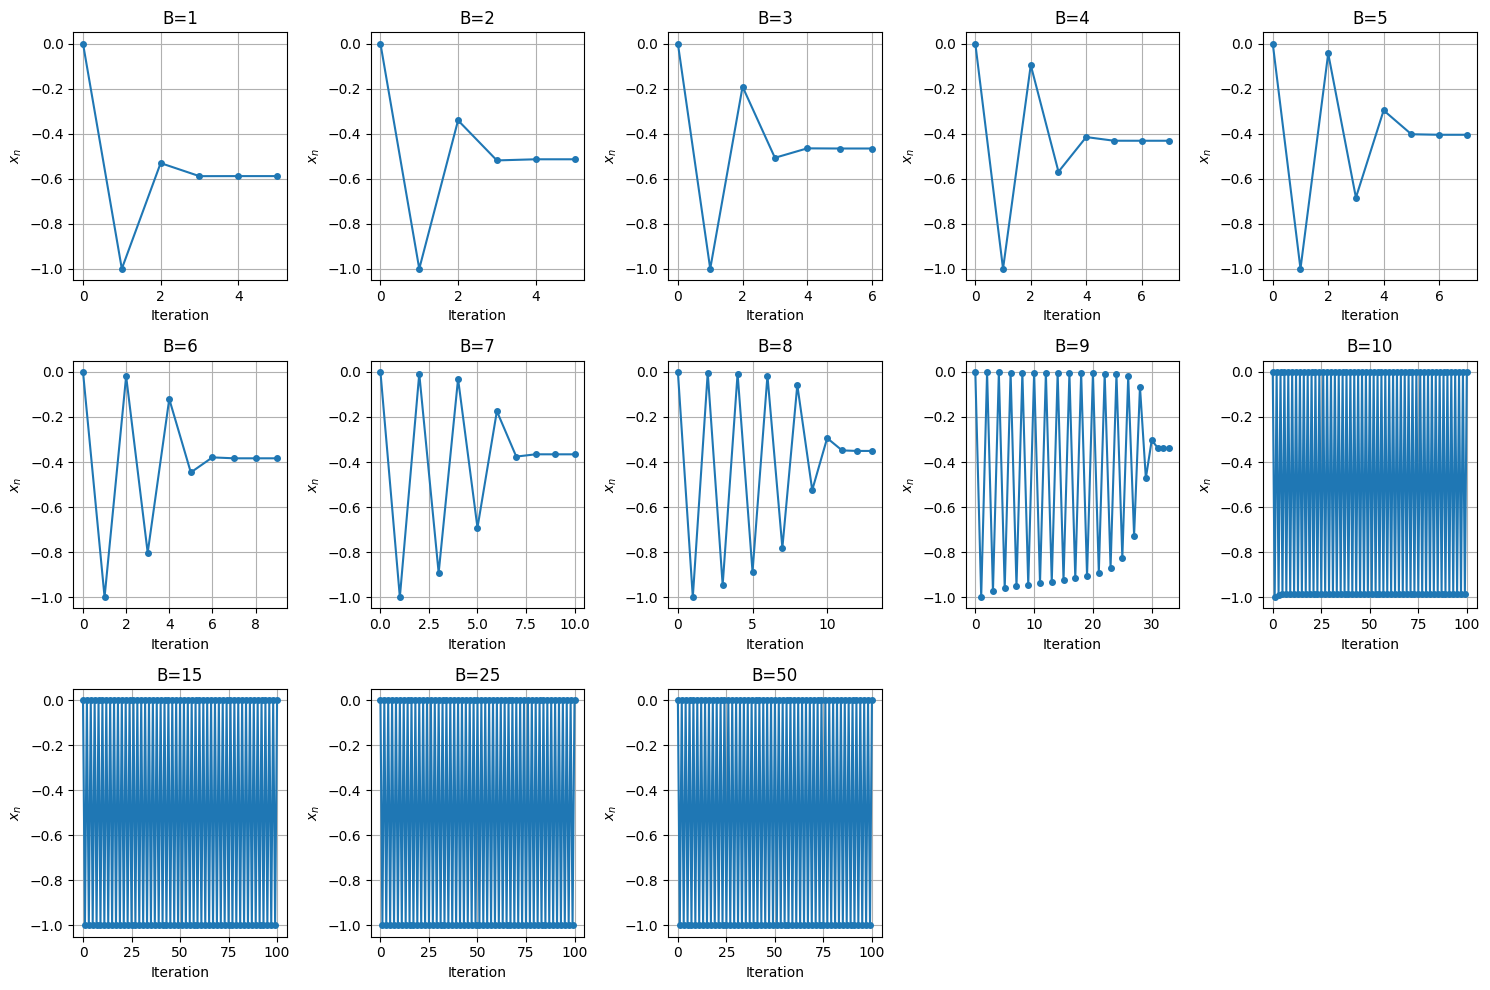

In [66]:
def newton_method_with_trace(f, df, x0, B, tol=1e-5, max_iter=100):
    """
    Applies Newton's Method and tracks the progress of each iteration.
    
    Returns:
    - A list of x values showing the progression of the algorithm.
    - The final approximation of the root, or None if not converged.
    """
    xn = x0
    trace = [x0]  # Initialize the trace list with the initial guess
    
    for n in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return trace, None
        h = fxn / dfxn
        xn_next = xn - h
        trace.append(xn_next)  # Add the new guess to the trace
        
        if abs(h) < tol and math.isclose(f(xn_next), 0, abs_tol=tol):
            return trace, xn_next
        xn = xn_next
        
    print(f"Failed to converge within {max_iter} iterations for B={B}.")
    return trace, None

# B values to explore
B_values = list(range(1, 11)) + [15, 25, 50]

# Create a panel of plots
plt.figure(figsize=(15, 10))
for i, B in enumerate(B_values, 1):
    trace, _ = newton_method_with_trace(lambda x: f(x, B), lambda x: df(x, B), x0, B)
    plt.subplot(3, 5, i)
    plt.plot(trace, marker='o', linestyle='-', markersize=4)
    plt.title(f'B={B}')
    plt.xlabel('Iteration')
    plt.ylabel('$x_n$')
    plt.tight_layout()
    plt.grid(True)

plt.show()